In [1]:
!python --version

Python 3.10.13


In [2]:
import sys
print("Python version:", sys.version)


Python version: 3.10.13 (main, Sep 11 2023, 13:21:10) [GCC 11.2.0]


In [108]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [10]:
# !unzip ./jupyter_resources/weather_image/weather_image_dataset.zip 

In [11]:
# !unzip "/home/siddharth/jupyter_nbks/jupyter_resources/weather_image_dataset.zip"

unzip:  cannot find or open /home/siddharth/jupyter_nbks/jupyter_resources/weather_image_dataset.zip, /home/siddharth/jupyter_nbks/jupyter_resources/weather_image_dataset.zip.zip or /home/siddharth/jupyter_nbks/jupyter_resources/weather_image_dataset.zip.ZIP.


In [2]:
# !unzip "dataset2.zip" 

In [3]:
# !unzip "./jupyter_resources/weather_image/dataset2.zip" -d "./jupyter_resources/weather_image" 

# -->This worked

In [4]:
# !unzip "jupyter_resources/weather_image/weatherdataset.zip" 
# ----->This wasn't working because the weatherdataset.zip has another dataset2.zip inside it which was getting extracted

In [5]:
# !conda install -c conda-forge patool -y
# A library used to unzip any file 

In [6]:
# import patool
# patool.extract_archive("jupyter_resources/weather_image/weatherdataset.zip",outdir="jupyter_resources/weather_image")

In [7]:
# !conda install -c anaconda scikit-learn -y

In [8]:
# !conda install -c anaconda matplotlib -y

In [123]:
# !conda install -c conda-forge keras-tuner -y

In [26]:
import os
import numpy as np
import tensorflow as tf
from IPython.display import Image,clear_output
import pandas as pd
import sklearn
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from matplotlib.pyplot import imread,imsave,imshow
from tensorflow.keras.preprocessing.image import load_img, array_to_img,img_to_array
import cv2
from PIL import Image as pil
from sklearn.preprocessing import LabelEncoder



In [29]:
# for file in os.listdir('jupyter_resources/weather_image'):
#     print(file[:-4])
    
#to remove.jpeg from file path


dataset2
weatherdataset
weathe


In [12]:
#using Ipython.diplay's Image module
Image(url="jupyter_resources/weather_image/weatherimg/cloudy75.jpg", width=300, height=300) 

In [27]:
# df=pd.DataFrame(columns=["name","type"])

# for image in os.listdir('jupyter_resources/weather_image/weatherimg'):
names=['jupyter_resources/weather_image/weatherimg/'+filename for filename in os.listdir('jupyter_resources/weather_image/weatherimg')]
typeswithnum=[filename[:-6] for filename in os.listdir('jupyter_resources/weather_image/weatherimg')]
#     types = ''.join([i for i in  typeswithnum if not i.isdigit()])
    
# for ele in typeswithnum:
types=[''.join([i for i in ele if not i.isdigit()]) for ele in typeswithnum]
# type(types)

# print(types)
# print(type(types))
# print(names)
# print(len(names))

In [28]:
df = pd.DataFrame(list(zip(names, types)),
               columns =['Name', 'Type'])
# df.iloc[[1:10]]
# df[df['Type']=='sunrise']
# len(df)

In [29]:
df['Type'].unique()
#Before preprocessing

array(['rain', 'cloudy', 'shine', 'sunris', 'sunrise', 'shin', 'cloud',
       'rai'], dtype=object)

In [30]:
# df['Type']='rain' if df['Type']=='rai'
#Only keeping the fore categories shown below
df.loc[df["Type"] == "rai", "Type"] = 'rain'
df.loc[df["Type"] == "cloud", "Type"] = 'cloudy'
df.loc[df["Type"] == "shin", "Type"] = 'shine'
df.loc[df["Type"] == "sunris", "Type"] = 'sunrise'


In [31]:
df['Type'].unique()
#After preprocessing

array(['rain', 'cloudy', 'shine', 'sunrise'], dtype=object)

In [32]:
lab = LabelEncoder()

#perform label encoding on 'team' column
encoded = lab.fit_transform(df['Type'])
encoded[1:10]
# print(type(encoded)) -->numpy array

array([0, 2, 2, 2, 0, 0, 3, 1, 0])

In [34]:
df['Type'].iloc[1:10]


1     cloudy
2      shine
3      shine
4      shine
5     cloudy
6     cloudy
7    sunrise
8       rain
9     cloudy
Name: Type, dtype: object

In [33]:
x_train,x_check,y_train,y_check=train_test_split(df['Name'],df['Type'],test_size=0.4,
                                                random_state=42)

In [12]:
print(len(x_train),len(x_check))

675 450


In [13]:
x_train[:10]

155     jupyter_resources/weather_image/weatherimg/shi...
1007    jupyter_resources/weather_image/weatherimg/shi...
357     jupyter_resources/weather_image/weatherimg/sun...
667     jupyter_resources/weather_image/weatherimg/sun...
223     jupyter_resources/weather_image/weatherimg/clo...
329     jupyter_resources/weather_image/weatherimg/rai...
614     jupyter_resources/weather_image/weatherimg/shi...
946     jupyter_resources/weather_image/weatherimg/rai...
913     jupyter_resources/weather_image/weatherimg/sun...
963     jupyter_resources/weather_image/weatherimg/sun...
Name: Name, dtype: object

In [35]:
# print(x_train_mat[0].shape)
type(x_train_mat[0])

numpy.ndarray

In [209]:
# k=[num.shape[0] for num in x_train_mat]
# ans=max(k)
# print(ans) -->3195

# k=[num.shape[0] for num in x_train_mat]
# ans=min(k)
# print(ans)  -->94


3195


In [26]:
print(len(x_train_mat))

675


In [169]:
x_train.loc[1] #This finds the index 1
x_train.iloc[1] # this finds the item at 1st(i.e 2nd pos considering starting from 0) irrespective of index
# Both are different because of indexes remaining after shuffling

'jupyter_resources/weather_image/weatherimg/shine144.jpg'

(169, 256, 3)


2023-10-16 15:05:21.905422: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(512, 512, 3)


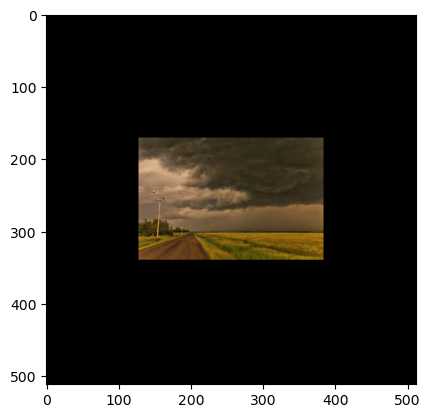

In [22]:
print(x_train_mat[289].shape)
imagecropped= tf.image.resize_with_crop_or_pad(x_train_mat[289], 512, 512)
print(imagecropped.shape)
# b=array_to_img(imagecropped)
# print(b.shape)
plt.imshow(imagecropped)

# plt.imshow(Z2, cmap ="Greens", alpha = 0.7,  
#            interpolation ='bilinear', extent = extent) 


In [36]:
x_test,x_val,y_test,y_val=train_test_split(x_check,y_check,test_size=0.5,random_state=42)

In [37]:
x_train_mat = [np.array(pil.open(ele)) for ele in x_train]
x_test_mat = [np.array(pil.open(ele)) for ele in x_test]
x_val_mat=[np.array(pil.open(ele)) for ele in x_val]

In [39]:
type(x_test_mat[0])

numpy.ndarray

In [40]:
print(x_val_mat[0].shape)

(173, 244, 3)


In [41]:
# print(len(x_train_mat))

# RUN THIS FOR X_TRAIN X_TEST AS WELL AS X_VAL BY CHANGING THE NAMES INSTEAD 


for i in range(len(x_train_mat)):
    if (len(x_train_mat[i].shape)<3):
        print(i,x_train_mat[i].shape)
        temp=x_train_mat[i]
        x_train_mat[i]=cv2.merge([temp,temp,temp])
        print(x_train_mat[i].shape)
print("------------")
for i in range(len(x_test_mat)):
    if (len(x_test_mat[i].shape)<3):
        temp=x_test_mat[i]
        print(i,temp.shape)
        x_test_mat[i]=cv2.merge([temp,temp,temp])
        print(x_test_mat[i].shape)
print("------------")
for i in range(len(x_val_mat)):
    if (len(x_val_mat[i].shape)<3):
        temp=x_val_mat[i]
        print(i,temp.shape)
        x_val_mat[i]=cv2.merge([temp,temp,temp])
        print(x_val_mat[i].shape)


299 (254, 600)
(254, 600, 3)
647 (288, 384)
(288, 384, 3)
------------
15 (453, 640)
(453, 640, 3)
58 (360, 480)
(360, 480, 3)
------------


In [16]:
print(len(x_train_mat))

675


In [42]:
count=0
for i in x_test_mat:
    if(len(i.shape)<3):
        count=count+1
        
print(count)

0


In [56]:
print(len(x_train_mat))

675


In [43]:
x_train_in= [(tf.image.resize_with_crop_or_pad(i, 128, 128))/128 for i in x_train_mat]
x_val_in=[(tf.image.resize_with_crop_or_pad(i, 128,128))/128 for i in x_val_mat]
x_test_in=[(tf.image.resize_with_crop_or_pad(i, 128,128))/128 for i in x_test_mat]

In [122]:
# x_train_in[0]

In [45]:
x_train_in= [np.array(ele) for ele in x_train_in]
x_val_in=[np.array(ele) for ele in x_val_in]
x_test_in=[np.array(ele) for ele in x_test_in]

y_train=y_train.to_list()
y_val=y_val.to_list()
y_test=y_test.to_list()

In [29]:
x_train_in[136].shape

(512, 512, 4)

In [46]:
arrs=[x_train_in,x_val_in,x_test_in]
labels=[y_train,y_val,y_test]
totlen=[len(x_train_in),len(x_val_in),len(x_test_in)]

for j in range(3):
#     for i in range(len(arrs[j])):
    i=0
    while(i<len(arrs[j])):
# np.delete(arr, 1, axis=0)
        temp=arrs[j][i]
        
        if((temp.shape[2]>3) or (temp.shape[2]<3)):
           arrs[j].pop(i)
#            labels[j]=np.delete(labels[j],i,axis=0)
           labels[j].pop(i) 
           i=i-1
        i=i+1

       

In [47]:
print(len(x_train_in),len(y_train))

674 674


In [48]:
print(x_train_in[135].shape,x_train_in[136].shape,x_train_in[137].shape)

(128, 128, 3) (128, 128, 3) (128, 128, 3)


In [49]:
x_train_in= [np.array(ele) for ele in x_train_in]
x_val_in=[np.array(ele) for ele in x_val_in]
x_test_in=[np.array(ele) for ele in x_test_in]

x_trin=np.array(x_train_in)
x_vin=np.array(x_val_in)
x_tein=np.array(x_test_in)

y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)

In [50]:
lab = LabelEncoder()
y_train_num=lab.fit_transform(y_train)
y_val_num=lab.fit_transform(y_val)
y_test_num=lab.fit_transform(y_test)

y_train_cat = tf.keras.utils.to_categorical(y_train_num, num_classes=4)
y_val_cat = tf.keras.utils.to_categorical(y_val_num, num_classes=4)
y_test_cat = tf.keras.utils.to_categorical(y_test_num, num_classes=4)



In [42]:
y_val_cat[:10]

array([2, 2, 0, 3, 3, 3, 0, 0, 3, 3])

In [37]:
# y_train[1:10]

array(['shine', 'sunrise', 'sunrise', 'cloudy', 'rain', 'shine', 'rain',
       'sunrise', 'sunrise'], dtype='<U7')

In [ ]:
# 0->cloudy
# 1->rain
# 2->shine
# 3->sunrise

In [51]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [ ]:
# def build_model(hp):
#     # create model object
#     model = keras.Sequential([
#     #adding first convolutional layer    
#     keras.layers.Conv2D(
#         #adding filter 
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         # adding filter size or kernel size
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         #activation function
#         activation='relu',
#         input_shape=(28,28,1)),
#     # adding second convolutional layer 
#     keras.layers.Conv2D(
#         #adding filter 
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         #adding filter size or kernel size
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         #activation function
#         activation='relu'
#     ),
#     # adding flatten layer    
#     keras.layers.Flatten(),
#     # adding dense layer    
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     # output layer    
#     keras.layers.Dense(10, activation='softmax')
#     ])
#     #compilation of model
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
#     return model

In [69]:
def build_model(hp):
    INPUT_SHAPE=(128,128,3)
    model=tf.keras.Sequential()
    for i in range(hp.Int('num_layers',min_value=3,max_value=8)):
        conv_win=hp.Choice("window_size",[3,5])
        num_layer=hp.Choice("no_of_layers",[32,64])
        model.add(layers.Conv2D(num_layer,(conv_win,conv_win),activation='relu',input_shape=INPUT_SHAPE))
        model.add(layers.MaxPooling2D((2,2)))
        
    model.add(layers.Flatten())
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(4,activation='softmax'))
    
    
    METRICS = metrics=['accuracy',
        Precision(name='precision'),
        Recall(name='recall')]

    model.compile(optimizer='adam',
        loss="categorical_crossentropy",
        metrics = METRICS)
    
    
    return model
    

In [52]:
# CREATING THE MODEL
# (32,32,3)
# INPUT_SHAPE=(128,128,3)
# model = tf.keras.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [ ]:
# model.add(tf.keras.Input(shape=(16,)))
# model.add(tf.keras.layers.Dense(8))

In [121]:
# model.summary()

In [54]:
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(4,activation='softmax'))
# EPOCHS = 10
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)



In [55]:
# METRICS = metrics=['accuracy',
#                Precision(name='precision'),
#                Recall(name='recall')]

# model.compile(optimizer='adam',
#         loss="categorical_crossentropy",
#         metrics = METRICS)

In [70]:
import keras_tuner
#creating randomsearch object
tuner = keras_tuner.RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 5)
# search best parameter
tuner.search(x_trin,y_train_cat,epochs=3,validation_data=(x_vin,y_val_cat))

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.7955555319786072

Best val_accuracy So Far: 0.7955555319786072
Total elapsed time: 00h 01m 39s
INFO:tensorflow:Oracle triggered exit


In [71]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0

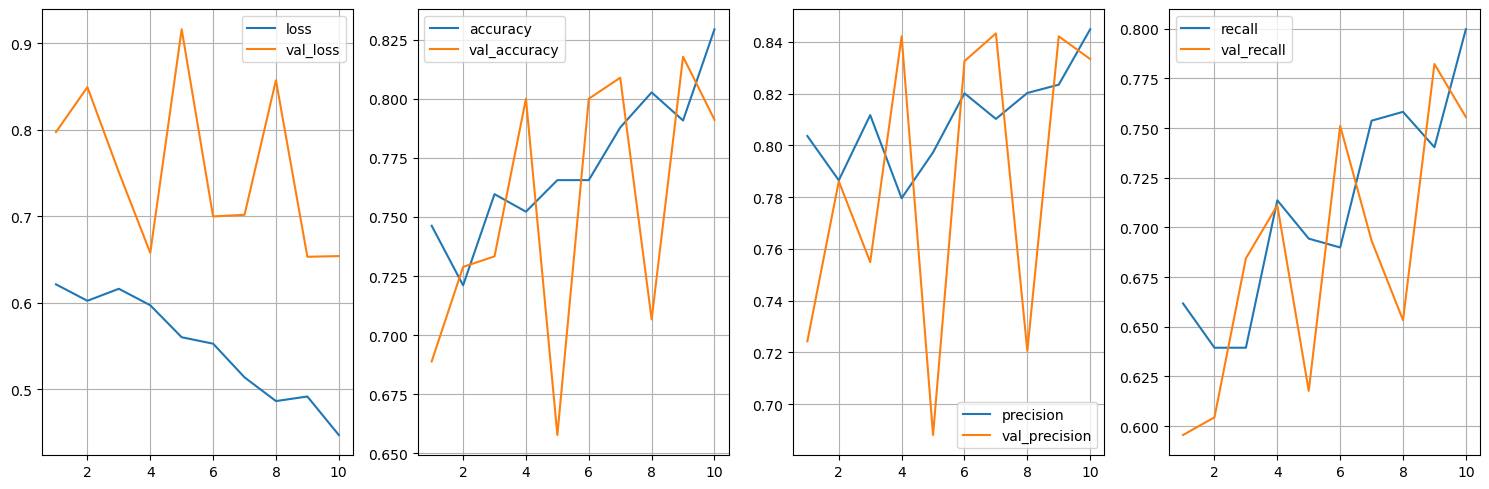

22/22 - 8s - loss: 0.4470 - accuracy: 0.8294 - precision: 0.8448 - recall: 0.7997 - val_loss: 0.6539 - val_accuracy: 0.7911 - val_precision: 0.8333 - val_recall: 0.7556 - 8s/epoch - 360ms/step


In [72]:
EPOCHS=10
callback_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
    
training_history = model.fit(x_trin, y_train_cat,
                             epochs=EPOCHS, batch_size=32,validation_data=(x_vin, y_val_cat),callbacks=[callback_early,PlotLearning()],verbose=2)

In [73]:
predictions = model.predict(x_tein, verbose=1)
predictions[:10] 


8/8 [==============================] - 1s 99ms/step


array([[2.1349376e-07, 2.3593484e-05, 5.1255098e-09, 9.9997616e-01],
       [2.2744838e-02, 9.6268624e-01, 2.9511862e-03, 1.1617784e-02],
       [5.9371993e-02, 4.7152648e-03, 9.2234552e-01, 1.3567236e-02],
       [3.4154209e-04, 9.1953307e-01, 2.1882062e-03, 7.7937126e-02],
       [1.4370574e-01, 2.6513785e-01, 2.5450638e-02, 5.6570578e-01],
       [1.2943290e-01, 8.1366563e-01, 2.8154796e-02, 2.8746681e-02],
       [2.7199984e-01, 4.0995855e-02, 6.3258165e-01, 5.4422744e-02],
       [4.0405644e-03, 9.6532184e-01, 2.9787760e-02, 8.4984652e-04],
       [2.1975842e-01, 3.3220820e-02, 6.5332001e-01, 9.3700781e-02],
       [1.1722783e-03, 4.2354467e-04, 9.9307692e-01, 5.3273113e-03]],
      dtype=float32)

In [74]:
y_test_num[:10]

array([3, 1, 2, 3, 3, 1, 0, 1, 0, 2])

In [75]:
pred_label=np.argmax(predictions,axis=1)
pred_label

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 2, 3, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 2,
       3, 0, 1, 2, 0, 1, 3, 2, 0, 0, 2, 3, 3, 3, 1, 2, 0, 1, 0, 1, 2, 1,
       0, 0, 3, 2, 1, 1, 2, 1, 3, 2, 0, 2, 1, 0, 1, 2, 2, 0, 3, 2, 1, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 0, 1, 0, 2, 2, 1, 1, 3, 0, 3, 0, 3, 1, 2,
       2, 1, 2, 1, 3, 2, 2, 0, 1, 3, 2, 0, 3, 1, 1, 3, 0, 0, 3, 2, 1, 1,
       3, 2, 2, 2, 1, 3, 2, 2, 2, 0, 3, 3, 3, 2, 3, 1, 2, 3, 2, 1, 3, 2,
       2, 1, 2, 3, 3, 3, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1,
       3, 0, 0, 1, 3, 1, 0, 3, 3, 1, 2, 0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 3,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 0, 0, 2, 1, 3, 3, 2, 3, 1, 1, 2, 1, 2,
       3, 0, 0, 2, 3, 3, 3, 2, 2, 1, 2, 1, 3, 2, 3, 0, 0, 2, 0, 2, 2, 0,
       3, 0, 3, 2, 0])

In [76]:
y_test_num

array([3, 1, 2, 3, 3, 1, 0, 1, 0, 2, 3, 0, 0, 1, 3, 0, 0, 1, 1, 0, 2, 2,
       3, 0, 1, 2, 0, 2, 3, 2, 0, 0, 2, 3, 3, 3, 1, 2, 0, 1, 0, 0, 2, 1,
       0, 0, 1, 1, 0, 2, 0, 0, 3, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 0, 1, 3, 0, 3, 2, 3, 1, 2,
       2, 1, 2, 0, 3, 0, 2, 1, 0, 3, 1, 0, 3, 0, 1, 3, 0, 0, 3, 2, 1, 1,
       3, 2, 1, 2, 0, 2, 2, 2, 2, 0, 3, 3, 3, 2, 3, 0, 2, 3, 2, 1, 3, 2,
       2, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 3, 0, 0, 0, 1,
       3, 2, 0, 1, 3, 1, 3, 3, 3, 1, 2, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 0, 2, 1, 3, 3, 2, 3, 0, 1, 2, 1, 2,
       3, 0, 0, 2, 3, 3, 3, 0, 2, 1, 2, 1, 3, 2, 3, 0, 0, 2, 0, 2, 2, 0,
       3, 0, 3, 2, 0])

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_label,y_test_num)
#currently we're using images of (512,512,3) cropped to (128,128,3) because of device limitations
#Th

0.7688888888888888

In [116]:
file_name = 'image_weather_model'
model.save(file_name)

INFO:tensorflow:Assets written to: image_weather_model/assets


INFO:tensorflow:Assets written to: image_weather_model/assets


In [117]:
new_model = tf.keras.models.load_model('image_weather_model')

In [118]:
new_predictions = new_model.predict(x_tein, verbose=1)
new_pred_label=np.argmax(predictions,axis=1)
new_pred_label

8/8 [==============================] - 1s 88ms/step


array([3, 1, 2, 1, 3, 1, 2, 1, 2, 2, 3, 0, 0, 0, 3, 1, 0, 1, 1, 0, 2, 2,
       3, 0, 1, 2, 0, 1, 3, 2, 0, 0, 2, 3, 3, 3, 1, 2, 0, 1, 0, 1, 2, 1,
       0, 0, 3, 2, 1, 1, 2, 1, 3, 2, 0, 2, 1, 0, 1, 2, 2, 0, 3, 2, 1, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 0, 1, 0, 2, 2, 1, 1, 3, 0, 3, 0, 3, 1, 2,
       2, 1, 2, 1, 3, 2, 2, 0, 1, 3, 2, 0, 3, 1, 1, 3, 0, 0, 3, 2, 1, 1,
       3, 2, 2, 2, 1, 3, 2, 2, 2, 0, 3, 3, 3, 2, 3, 1, 2, 3, 2, 1, 3, 2,
       2, 1, 2, 3, 3, 3, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1,
       3, 0, 0, 1, 3, 1, 0, 3, 3, 1, 2, 0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 3,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 0, 0, 2, 1, 3, 3, 2, 3, 1, 1, 2, 1, 2,
       3, 0, 0, 2, 3, 3, 3, 2, 2, 1, 2, 1, 3, 2, 3, 0, 0, 2, 0, 2, 2, 0,
       3, 0, 3, 2, 0])

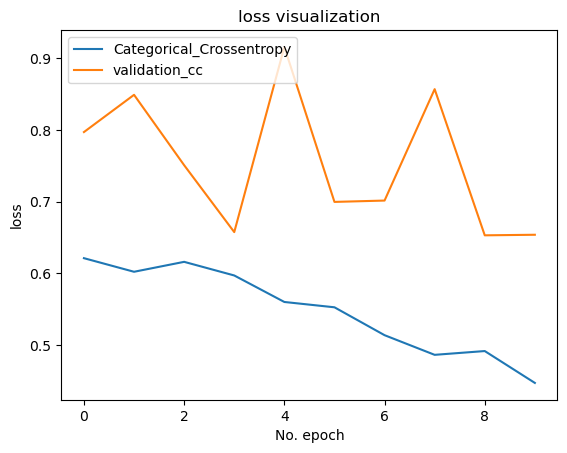

In [119]:
# Plot history: MAE
plt.plot(training_history.history['loss'], label='Categorical_Crossentropy')
plt.plot(training_history.history['val_loss'], label='validation_cc')
plt.title('loss visualization')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

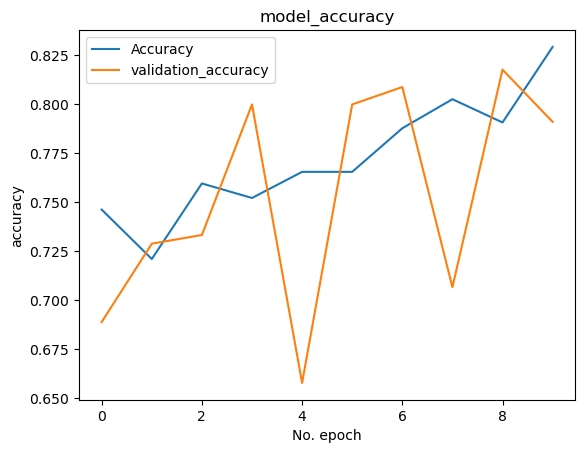

In [120]:
# Plot history: MAE
plt.plot(training_history.history['accuracy'], label='Accuracy')
plt.plot(training_history.history['val_accuracy'], label='validation_accuracy')
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [23]:
# im = pil.open(r"cloudy77.jpg")   
#OR

# im=pil.open("cloudy77.jpg",mode="r")
    
# This method will show image in any image viewer  
# im.show()  

In [98]:
y_train[132]

'rain'

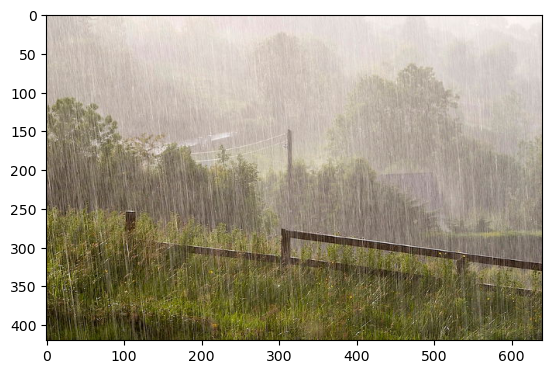

In [97]:
plt.imshow(x_train_mat[132])

In [113]:
y_test[25]

'shine'

In [114]:
pred_label[25]
# 0->cloudy
# 1->rain
# 2->shine
# 3->sunrise

2

In [110]:
x_test.iloc[25]

'jupyter_resources/weather_image/weatherimg/shine180.jpg'

In [111]:
Image(url=x_test.iloc[25])

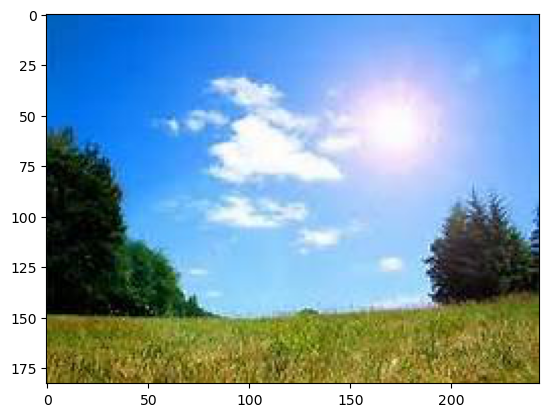

In [112]:
plt.imshow(x_test_mat[25])

In [95]:
# img = pil.fromarray(x_test_mat[132])
# img.show()

In [96]:

# matplotlib.image.imsave('name.jpg', img)

# imageMat=img

# imageMat_reshape = imageMat.reshape(imageMat.shape[0],-1)

# loaded_mat = imageMat_reshape.reshape(imageMat_reshape.shape[0], 
#                                    imageMat_reshape.shape[1] // imageMat.shape[2],
#                                    imageMat.shape[2])

# matplotlib.image.imsave('name_ret.jpg',loaded_mat)
# print(loaded_mat.shape)

# Image(url='name_ret.jpg')